<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Artem/lenet/Artem_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MODEL FROM PREVIOUS EXPERIMENT***

<table>
  <tr>
    <th>Layer</th>
    <th>Layer type2</th>
    <th>Feature maps</th>
    <th>Size</th>
    <th>Kernel size</th>
    <th>Stride</th>
    <th>Padding</th>
    <th>Activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>2</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>4</th>
    <th>convolution</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>5</th>
    <th>convolution</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>6</th>
    <th>avg pooling</th>
    <th>4</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>7</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>8</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>9</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>10</th>
    <th>convolution</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>11</th>
    <th>convolution</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>12</th>
    <th>max pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>13</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>14</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>35</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

Train dataset: MNIST + EMNIST letters

Test dataset: dataset of DreamTeam

Training sample size: 36960

Testing sample size: 16784

Loss function: Cross Entropy Loss

Optimizer: Adam

Learning rate: 1.0e-3

Batch size: 1120

***IMPORT***

---

In [1]:
import torch
import torchvision.datasets
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm_notebook as bar
import plotly.graph_objects as go


In [19]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [29]:
import scipy.stats as stats

***REPO***

---



In [2]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36536, done.
remote: Counting objects: 100% (12896/12896), done.
remote: Compressing objects: 100% (12728/12728), done.
remote: Total 36536 (delta 211), reused 12804 (delta 159), pack-reused 23640
Receiving objects: 100% (36536/36536), 129.65 MiB | 14.92 MiB/s, done.
Resolving deltas: 100% (496/496), done.


***TORCH.DEVICE***

---



In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

***DATASET***

---



In [4]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:33<00:00, 16726112.95it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


***DEFAULT NET***

In [5]:
class LeNet1(torch.nn.Module):
  def __init__(self):
    super(LeNet1, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
    self.act1 = torch.nn.ReLU6()
    self.conv2 = torch.nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, padding=1)
    self.act2 = torch.nn.ReLU6()
    self.conv3 = torch.nn.Conv2d(in_channels=2, out_channels=4, kernel_size=3, padding=1)
    self.act3 = torch.nn.ReLU6()
    self.conv4 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.act4 = torch.nn.ReLU6()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU6()
    self.conv5 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, padding=0)
    self.act6 = torch.nn.ReLU6()
    self.conv6 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
    self.act7 = torch.nn.ReLU6()
    self.conv7 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0)
    self.act8 = torch.nn.ReLU6()
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.act9 = torch.nn.ReLU6()
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU6()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU6()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU6()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    skip_conn1 = x

    x = self.conv2(x)
    x = self.act2(x)
    x = torch.add(x, skip_conn1)

    x = self.conv3(x)
    x = self.act3(x)
    skip_conn2 = x

    x = self.conv4(x)
    x = self.act4(x)
    x = torch.add(x, skip_conn2)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.act6(x)
    skip_conn3 = x

    x = self.conv6(x)
    x = self.act7(x)
    x = torch.add(x, skip_conn3)

    x = self.conv7(x)
    x = self.act8(x)
    skip_conn4 = x

    x = self.conv8(x)
    x = self.act9(x)
    x = torch.add(x, skip_conn4)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

***NET WITH BATCH***

In [6]:
class LeNet2(torch.nn.Module):
  def __init__(self):
    super(LeNet2, self).__init__()

    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
    self.batch1 = torch.nn.BatchNorm2d(2)
    self.act1 = torch.nn.ReLU6()

    self.conv2 = torch.nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, padding=1)
    self.batch2 = torch.nn.BatchNorm2d(2)
    self.act2 = torch.nn.ReLU6()

    self.conv3 = torch.nn.Conv2d(in_channels=2, out_channels=4, kernel_size=3, padding=1)
    self.batch3 = torch.nn.BatchNorm2d(4)
    self.act3 = torch.nn.ReLU6()

    self.conv4 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.batch4 = torch.nn.BatchNorm2d(4)
    self.act4 = torch.nn.ReLU6()

    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU6()

    self.conv5 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, padding=0)
    self.batch5 = torch.nn.BatchNorm2d(8)
    self.act6 = torch.nn.ReLU6()

    self.conv6 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
    self.batch6 = torch.nn.BatchNorm2d(8)
    self.act7 = torch.nn.ReLU6()

    self.conv7 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0)
    self.batch7 = torch.nn.BatchNorm2d(16)
    self.act8 = torch.nn.ReLU6()

    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.batch8 = torch.nn.BatchNorm2d(16)
    self.act9 = torch.nn.ReLU6()

    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU6()

    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU6()

    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU6()

    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batch1(x)
    x = self.act1(x)
    skip_conn1 = x

    x = self.conv2(x)
    x = self.batch2(x)
    x = self.act2(x)
    x = torch.add(x, skip_conn1)

    x = self.conv3(x)
    x = self.batch3(x)
    x = self.act3(x)
    skip_conn2 = x

    x = self.conv4(x)
    x = self.batch4(x)
    x = self.act4(x)
    x = torch.add(x, skip_conn2)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.batch5(x)
    x = self.act6(x)
    skip_conn3 = x

    x = self.conv6(x)
    x = self.batch6(x)
    x = self.act7(x)
    x = torch.add(x, skip_conn3)

    x = self.conv7(x)
    x = self.batch7(x)
    x = self.act8(x)
    skip_conn4 = x

    x = self.conv8(x)
    x = self.batch8(x)
    x = self.act9(x)
    x = torch.add(x, skip_conn4)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

***NET WITH DROPOUTS***

In [7]:
class LeNet3(torch.nn.Module):
  def __init__(self, dropout_rate):
    super(LeNet3, self).__init__()

    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
    self.act1 = torch.nn.ReLU6()
    self.dp1 = torch.nn.Dropout(p=dropout_rate)

    self.conv2 = torch.nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, padding=1)
    self.act2 = torch.nn.ReLU6()
    self.dp2 = torch.nn.Dropout(p=dropout_rate)

    self.conv3 = torch.nn.Conv2d(in_channels=2, out_channels=4, kernel_size=3, padding=1)
    self.act3 = torch.nn.ReLU6()
    self.dp3 = torch.nn.Dropout(p=dropout_rate)

    self.conv4 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.act4 = torch.nn.ReLU6()
    self.dp4 = torch.nn.Dropout(p=dropout_rate)

    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU6()

    self.conv5 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, padding=0)
    self.act6 = torch.nn.ReLU6()
    self.dp5 = torch.nn.Dropout(p=dropout_rate)

    self.conv6 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
    self.act7 = torch.nn.ReLU6()
    self.dp6 = torch.nn.Dropout(p=dropout_rate)

    self.conv7 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0)
    self.act8 = torch.nn.ReLU6()
    self.dp7 = torch.nn.Dropout(p=dropout_rate)

    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.act9 = torch.nn.ReLU6()
    self.dp8 = torch.nn.Dropout(p=dropout_rate)

    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU6()

    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU6()

    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU6()

    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.dp1(x)
    skip_conn1 = x

    x = self.conv2(x)
    x = self.act2(x)
    x = self.dp2(x)
    x = torch.add(x, skip_conn1)

    x = self.conv3(x)
    x = self.act3(x)
    x = self.dp3(x)
    skip_conn2 = x

    x = self.conv4(x)
    x = self.act4(x)
    x = self.dp4(x)
    x = torch.add(x, skip_conn2)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.act6(x)
    x = self.dp5(x)
    skip_conn3 = x

    x = self.conv6(x)
    x = self.act7(x)
    x = self.dp6(x)
    x = torch.add(x, skip_conn3)

    x = self.conv7(x)
    x = self.act8(x)
    x = self.dp7(x)
    skip_conn4 = x

    x = self.conv8(x)
    x = self.act9(x)
    x = self.dp8(x)
    x = torch.add(x, skip_conn4)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

***NET WITH BATCH AND DROPOUTS***

In [8]:
class LeNet4(torch.nn.Module):
  def __init__(self, dropout_rate):
    super(LeNet4, self).__init__()

    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
    self.batch1 = torch.nn.BatchNorm2d(2)
    self.act1 = torch.nn.ReLU6()
    self.dp1 = torch.nn.Dropout(p=dropout_rate)

    self.conv2 = torch.nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, padding=1)
    self.batch2 = torch.nn.BatchNorm2d(2)
    self.act2 = torch.nn.ReLU6()
    self.dp2 = torch.nn.Dropout(p=dropout_rate)

    self.conv3 = torch.nn.Conv2d(in_channels=2, out_channels=4, kernel_size=3, padding=1)
    self.batch3 = torch.nn.BatchNorm2d(4)
    self.act3 = torch.nn.ReLU6()
    self.dp3 = torch.nn.Dropout(p=dropout_rate)

    self.conv4 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.batch4 = torch.nn.BatchNorm2d(4)
    self.act4 = torch.nn.ReLU6()
    self.dp4 = torch.nn.Dropout(p=dropout_rate)

    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU6()

    self.conv5 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, padding=0)
    self.batch5 = torch.nn.BatchNorm2d(8)
    self.act6 = torch.nn.ReLU6()
    self.dp5 = torch.nn.Dropout(p=dropout_rate)

    self.conv6 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
    self.batch6 = torch.nn.BatchNorm2d(8)
    self.act7 = torch.nn.ReLU6()
    self.dp6 = torch.nn.Dropout(p=dropout_rate)

    self.conv7 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0)
    self.batch7 = torch.nn.BatchNorm2d(16)
    self.act8 = torch.nn.ReLU6()
    self.dp7 = torch.nn.Dropout(p=dropout_rate)

    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.batch8 = torch.nn.BatchNorm2d(16)
    self.act9 = torch.nn.ReLU6()
    self.dp8 = torch.nn.Dropout(p=dropout_rate)

    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU6()

    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU6()

    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU6()

    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batch1(x)
    x = self.act1(x)
    x = self.dp1(x)
    skip_conn1 = x

    x = self.conv2(x)
    x = self.batch2(x)
    x = self.act2(x)
    x = self.dp2(x)
    x = torch.add(x, skip_conn1)

    x = self.conv3(x)
    x = self.batch3(x)
    x = self.act3(x)
    x = self.dp3(x)
    skip_conn2 = x

    x = self.conv4(x)
    x = self.batch4(x)
    x = self.act4(x)
    x = self.dp4(x)
    x = torch.add(x, skip_conn2)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.batch5(x)
    x = self.act6(x)
    x = self.dp5(x)
    skip_conn3 = x

    x = self.conv6(x)
    x = self.batch6(x)
    x = self.act7(x)
    x = self.dp6(x)
    x = torch.add(x, skip_conn3)

    x = self.conv7(x)
    x = self.batch7(x)
    x = self.act8(x)
    x = self.dp7(x)
    skip_conn4 = x

    x = self.conv8(x)
    x = self.batch8(x)
    x = self.act9(x)
    x = self.dp8(x)
    x = torch.add(x, skip_conn4)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

***LEARNING***

1) 118 epoches

In [ ]:
batch_size = 1120
loss = torch.nn.CrossEntropyLoss()
lenet = LeNet1().to(device)
optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'LEARNING'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)
    print(test_accuracy)
print('ACCURACY OF 1st MODEL:\n', *test_accuracy_history)

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="DEFAULT NET", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

2) 35 epoches

In [ ]:
batch_size = 1120
loss = torch.nn.CrossEntropyLoss()
lenet = LeNet2().to(device)
optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'LEARNING'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)
    print(test_accuracy)
print('ACCURACY OF 2nd MODEL:\n', *test_accuracy_history)

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="NET WITH BATCH", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

3) [205,104,147,69,110,104]

In [ ]:
dropout_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
batch_size = 1120
loss = torch.nn.CrossEntropyLoss()
test_accuracy_history = [[], [], [], [], [], []]

for rate in bar(range(6), desc='DROPOUT RATE', leave=False):
  lenet = LeNet3(dropout_rate[rate]).to(device)
  optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
  for epoch in bar(range(200), desc = 'LEARNING', leave=False):
    order = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index+batch_size]

      data_batch = train_data[batch_indexes].to(device)
      label_batch = train_labels[batch_indexes].to(device)

      preds = lenet.forward(data_batch)

      loss_val = loss(preds, label_batch)
      loss_val.backward()

      optimizer.step()

    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      test_accuracy_history[rate].append(test_accuracy)
      print(test_accuracy)
print(f'ACCURACY OF 3.{rate+1} MODEL:\n', *test_accuracy_history[rate])

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[0], mode ="lines+markers"))
fig.update_layout(title="DROPOUT_RATE = 0.5", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[1], mode ="lines+markers"))
fig.update_layout(title="DROPOUT_RATE = 0.1", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[2], mode ="lines+markers"))
fig.update_layout(title="DROPOUT_RATE = 0.05", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[3], mode ="lines+markers"))
fig.update_layout(title="DROPOUT_RATE = 0.01", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[4], mode ="lines+markers"))
fig.update_layout(title="DROPOUT_RATE = 0.005", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[5], mode ="lines+markers"))
fig.update_layout(title="DROPOUT_RATE = 0.001", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

4) [171,141,47,59,72,33]

In [ ]:
dropout_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
batch_size = 1120
loss = torch.nn.CrossEntropyLoss()
test_accuracy_history = [[], [], [], [], [], []]

for rate in bar(range(6), desc='DROPOUT RATE', leave=False):
  lenet = LeNet4(dropout_rate[rate]).to(device)
  optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
  for epoch in bar(range(200), desc='LEARNING', leave=False):
    order = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index+batch_size]

      data_batch = train_data[batch_indexes].to(device)
      label_batch = train_labels[batch_indexes].to(device)

      preds = lenet.forward(data_batch)

      loss_val = loss(preds, label_batch)
      loss_val.backward()

      optimizer.step()

    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      test_accuracy_history[rate].append(test_accuracy)

<ipython-input-35-513434192f9f>:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



DROPOUT RATE:   0%|          | 0/6 [00:00<?, ?it/s]

<ipython-input-35-513434192f9f>:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



LEARNING:   0%|          | 0/200 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/200 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/200 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/200 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/200 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[0], mode ="lines+markers"))
fig.update_layout(title="BATCH + DROPOUT_RATE = 0.5", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[1], mode ="lines+markers"))
fig.update_layout(title="BATCH + DROPOUT_RATE = 0.1", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[2], mode ="lines+markers"))
fig.update_layout(title="BATCH + DROPOUT_RATE = 0.05", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[3], mode ="lines+markers"))
fig.update_layout(title="BATCH + DROPOUT_RATE = 0.01", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[4], mode ="lines+markers"))
fig.update_layout(title="BATCH + DROPOUT_RATE = 0.005", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history[5], mode ="lines+markers"))
fig.update_layout(title="BATCH + DROPOUT_RATE = 0.001", xaxis_title = "EPOCH", yaxis_title = "ACCURACY")
fig.show()

***EXPERIMENT WITH EPOCHES***

In [ ]:
accuracy_net = []
for experiment in bar(range(20), desc = 'EXPERIMENT'):
  loss = torch.nn.CrossEntropyLoss()
  lenet = LeNet1().to(device)
  optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
  batch_size = 1120
  max_acc = 0

  for epoch in range(118):
    order = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index+batch_size]

      data_batch = train_data[batch_indexes]
      labels_batch= train_labels[batch_indexes]

      preds = lenet.forward(data_batch)

      loss_val = loss(preds, labels_batch)
      loss_val.backward()

      optimizer.step()
    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      max_acc = max(max_acc, accuracy)
  accuracy_net.append(max_acc)
  print(max_acc)
print('ACCURACY OF 1st MODEL:\n', *accuracy_net)

In [22]:
acc1 = "tensor(0.7182) tensor(0.7186) tensor(0.7147) tensor(0.7340) tensor(0.7180) tensor(0.7148) tensor(0.7160) tensor(0.7207) tensor(0.7213) tensor(0.7213) tensor(0.7222) tensor(0.7120) tensor(0.7225) tensor(0.7268) tensor(0.7397) tensor(0.7233) tensor(0.7325) tensor(0.7045)"

In [ ]:
accuracy_net = []
for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

  loss = torch.nn.CrossEntropyLoss()
  lenet = LeNet2().to(device)

  optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
  batch_size = 1120
  max_acc = 0

  for epoch in bar(range(35), leave=False):
    order = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index+batch_size]

      data_batch = train_data[batch_indexes]
      labels_batch= train_labels[batch_indexes]

      preds = lenet.forward(data_batch)

      loss_val = loss(preds, labels_batch)
      loss_val.backward()

      optimizer.step()
    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      max_acc = max(max_acc, accuracy)
  accuracy_net.append(max_acc)
  print(max_acc)
print('ACCURACY OF 2nd MODEL:\n', *accuracy_net)

In [23]:
acc2 = "tensor(0.7261) tensor(0.7246) tensor(0.7000) tensor(0.7102) tensor(0.7364) tensor(0.7243) tensor(0.7470) tensor(0.7421) tensor(0.7535) tensor(0.6815) tensor(0.7428) tensor(0.6279) tensor(0.6547) tensor(0.7359) tensor(0.7280) tensor(0.7422) tensor(0.7506) tensor(0.6987) tensor(0.6503) tensor(0.7093)"

In [ ]:
dropout_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
epochs = [205,104,147,69,110,104]

for rate in bar(range(6), desc = "DROPOUT RATE", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet3(dropout_rate[rate]).to(device)

    optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
    batch_size = 1120
    max_acc = 0

    for epoch in bar(range(epochs[rate]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print(f'ACCURACY OF 3.{rate+1} MODEL:\n', *accuracy_net)

In [24]:
acc3_0 = "tensor(0.5991) tensor(0.6754) tensor(0.6535) tensor(0.6773) tensor(0.5614) tensor(0.5723) tensor(0.6599) tensor(0.6379) tensor(0.6791) tensor(0.6047) tensor(0.6546) tensor(0.5907) tensor(0.5968) tensor(0.6918) tensor(0.6437) tensor(0.6322) tensor(0.5952) tensor(0.5083) tensor(0.6255)"
acc3_1 = "tensor(0.7235) tensor(0.7484) tensor(0.7274) tensor(0.7356) tensor(0.7252) tensor(0.7490) tensor(0.7201) tensor(0.7446) tensor(0.7459) tensor(0.7138) tensor(0.7422) tensor(0.7403) tensor(0.7314) tensor(0.7618) tensor(0.7348) tensor(0.7453) tensor(0.7397) tensor(0.7273) tensor(0.7408) tensor(0.7451)"
acc3_2 = "tensor(0.7406) tensor(0.7413) tensor(0.7418) tensor(0.7373) tensor(0.7444) tensor(0.7330) tensor(0.7172) tensor(0.7546) tensor(0.7342) tensor(0.7366) tensor(0.7526) tensor(0.7320) tensor(0.7372) tensor(0.7160) tensor(0.7462) tensor(0.7256) tensor(0.7353) tensor(0.7431) tensor(0.7359) tensor(0.7272)"
acc3_3 = "tensor(0.7416) tensor(0.7154) tensor(0.7268) tensor(0.7294) tensor(0.7054) tensor(0.7392) tensor(0.7348) tensor(0.7246) tensor(0.7241) tensor(0.7207) tensor(0.7391) tensor(0.7167) tensor(0.6872) tensor(0.7091) tensor(0.7309) tensor(0.6950) tensor(0.7348) tensor(0.6820) tensor(0.7061)"
acc3_4 = "tensor(0.7275) tensor(0.7140) tensor(0.7207) tensor(0.7271) tensor(0.7290) tensor(0.7286) tensor(0.7046) tensor(0.7347) tensor(0.7263) tensor(0.7278) tensor(0.7151) tensor(0.7342) tensor(0.7372) tensor(0.7306) tensor(0.7327) tensor(0.6839) tensor(0.7167) tensor(0.7215) tensor(0.7165)"
acc3_5 = "tensor(0.7127) tensor(0.7310) tensor(0.7106) tensor(0.7267) tensor(0.7213) tensor(0.7216) tensor(0.7101) tensor(0.7232) tensor(0.7108) tensor(0.7235) tensor(0.7372) tensor(0.7266) tensor(0.7249) tensor(0.7264) tensor(0.7293) tensor(0.6998) tensor(0.7283) tensor(0.7239) tensor(0.7375) tensor(0.7171)"

In [ ]:
dropout_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
epochs = [171,141,47,59,72,33]

for rate in bar(range(6), desc = "DROPOUT RATE", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet4(dropout_rate[rate]).to(device)

    optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
    batch_size = 1120
    max_acc = 0

    for epoch in bar(range(epochs[rate]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print(f'ACCURACY OF 4.{rate} MODEL:\n', *accuracy_net)

In [ ]:
dropout_rate = [0.1, 0.05, 0.01, 0.005, 0.001]
epochs = [141,47,59,72,33]

for rate in bar(range(5), desc = "DROPOUT RATE", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet4(dropout_rate[rate]).to(device)

    optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
    batch_size = 1120
    max_acc = 0

    for epoch in bar(range(epochs[rate]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print(f'ACCURACY OF 4.{rate+1} MODEL:\n', *accuracy_net)

In [25]:
acc4_0 = "tensor(0.6564) tensor(0.6586) tensor(0.6390) tensor(0.6250) tensor(0.7214) tensor(0.6965) tensor(0.6738) tensor(0.6822) tensor(0.7007) tensor(0.6971) tensor(0.7067) tensor(0.6618) tensor(0.6691) tensor(0.6736) tensor(0.6641) tensor(0.6847) tensor(0.6226) tensor(0.6895) tensor(0.6595) tensor(0.6286)"
acc4_1 = "tensor(0.7471) tensor(0.7701) tensor(0.7646) tensor(0.7560) tensor(0.7721) tensor(0.7629) tensor(0.7675) tensor(0.7545) tensor(0.7745) tensor(0.7666) tensor(0.7671) tensor(0.7504) tensor(0.7899) tensor(0.7805) tensor(0.7891) tensor(0.7847) tensor(0.7655) tensor(0.7525) tensor(0.7743) tensor(0.7506)"
acc4_2 = "tensor(0.7747) tensor(0.7565) tensor(0.7752) tensor(0.7832) tensor(0.7759) tensor(0.7514) tensor(0.7236) tensor(0.7539) tensor(0.7445) tensor(0.7722) tensor(0.7601) tensor(0.7671) tensor(0.7273) tensor(0.7708) tensor(0.7691) tensor(0.7564) tensor(0.7683) tensor(0.7331) tensor(0.7626) tensor(0.7610)"
acc4_3 = "tensor(0.7460) tensor(0.7280) tensor(0.7405) tensor(0.7305) tensor(0.7458) tensor(0.7608) tensor(0.7659) tensor(0.7298) tensor(0.7636) tensor(0.7161) tensor(0.7648) tensor(0.7521) tensor(0.7724) tensor(0.7495) tensor(0.7384) tensor(0.7598) tensor(0.7551) tensor(0.7606) tensor(0.7567) tensor(0.7504)"
acc4_4 = "tensor(0.7188) tensor(0.7408) tensor(0.7476) tensor(0.7428) tensor(0.7587) tensor(0.7589) tensor(0.7410) tensor(0.7407) tensor(0.7584) tensor(0.7629) tensor(0.7454) tensor(0.7453) tensor(0.7312) tensor(0.7407) tensor(0.7496) tensor(0.7357) tensor(0.7519) tensor(0.7511) tensor(0.7365) tensor(0.7585)"
acc4_5 = "tensor(0.7179) tensor(0.7532) tensor(0.7177) tensor(0.7180) tensor(0.7324) tensor(0.7305) tensor(0.7318) tensor(0.7309) tensor(0.7130) tensor(0.7482) tensor(0.6700) tensor(0.7284) tensor(0.6964) tensor(0.7356) tensor(0.7241) tensor(0.7107) tensor(0.7046) tensor(0.7420) tensor(0.7348) tensor(0.7350)"

In [26]:
samples = [acc1, acc2, acc3_0, acc3_1, acc3_2, acc3_3, acc3_4, acc3_5, acc4_0, acc4_1, acc4_2, acc4_3, acc4_4, acc4_5]
for i in range(len(samples)):
    samples[i] = list(map(float, samples[i].replace("tensor(", '').replace(')', '').replace("[","").replace("]", "").split()))

{'whiskers': [<matplotlib.lines.Line2D at 0x7ae1905224a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ae192637850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ae190522200>,
 'medians': [<matplotlib.lines.Line2D at 0x7ae190522980>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ae190522c20>,
 'means': []}

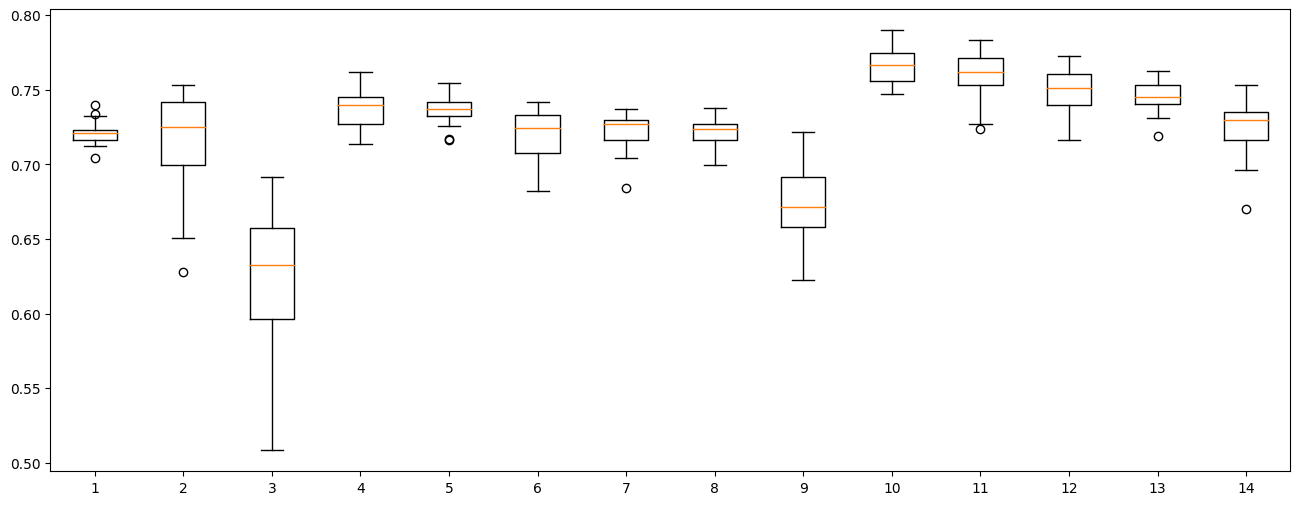

In [27]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [30]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val


0.43341623391007034

In [31]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[2])
p_val


6.839158681816284e-08

In [32]:
t_stat, p_val = stats.ttest_ind(samples[1], samples[3])
p_val


0.010210416276496813

In [33]:
t_stat, p_val = stats.ttest_ind(samples[3], samples[4])
p_val


0.8838876517278773

In [34]:
t_stat, p_val = stats.ttest_ind(samples[3], samples[5])
p_val


0.0005622914427574036

In [35]:
t_stat, p_val = stats.ttest_ind(samples[3], samples[6])
p_val


0.0006134902382904839

In [36]:
t_stat, p_val = stats.ttest_ind(samples[3], samples[7])
p_val


7.331582170818569e-05

In [37]:
t_stat, p_val = stats.ttest_ind(samples[3], samples[8])
p_val


4.583108836868947e-12

In [38]:
t_stat, p_val = stats.ttest_ind(samples[3], samples[9])
p_val


2.6154371974001343e-09

In [39]:
t_stat, p_val = stats.ttest_ind(samples[9], samples[10])
p_val


0.10870144955678467

In [40]:
t_stat, p_val = stats.ttest_ind(samples[9], samples[11])
p_val


0.0002624608680203041

In [41]:
t_stat, p_val = stats.ttest_ind(samples[9], samples[12])
p_val


1.8085979980679783e-06

In [42]:
t_stat, p_val = stats.ttest_ind(samples[9], samples[13])
p_val


2.895229847321963e-10

Самая лучшая сеть - Сеть 4_1 с батч-нормализацией и dropout_rate = 0.1